<a href="https://colab.research.google.com/github/jeewoo1025/aiEducation/blob/main/AI_%EA%B8%B0%EB%B0%98_%ED%9A%8C%EC%9D%98_%EB%85%B9%EC%B7%A8%EB%A1%9D_%EC%9A%94%EC%95%BD_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Mecab 설치

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.9 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2

In [ ]:
# 환경변수 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# Mecab 설치
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2498k      0 --:--:-- --:--:-- --:--:-- 2498k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

mecab = Mecab()
sentence = "안녕하세요 저는 상휴입니다."
temp_X = mecab.pos(sentence)
temp_X

[('안녕', 'NNG'),
 ('하', 'XSV'),
 ('세요', 'EP+EF'),
 ('저', 'NP'),
 ('는', 'JX'),
 ('상', 'NNG'),
 ('휴', 'NNP'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF')]

## 사용패키지

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import random
import math
import copy
import gc
from tqdm import tqdm
from glob import glob
from konlpy.tag import Mecab

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings(action='ignore')

## 랜던시드 고정

In [ ]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [ ]:
seed_everything(42)

## 데이터 로드

In [ ]:
DIR = "./gdrive/MyDrive/data"
TRAIN_SOURCE = os.path.join(DIR, "train.json")
TEST_SOURCE = os.path.join(DIR, "test.json")

In [ ]:
with open(TRAIN_SOURCE) as f:
    TRAIN_DATA = json.loads(f.read())
    
with open(TEST_SOURCE) as f:
    TEST_DATA = json.loads(f.read())

In [ ]:
train = pd.DataFrame(columns=['uid', 'title', 'region', 'context', 'summary'])
uid = 1000
for data in TRAIN_DATA:
    for agenda in data['context'].keys():
        context = ''
        for line in data['context'][agenda]:
            context += data['context'][agenda][line]
            context += ' '
        train.loc[uid, 'uid'] = uid
        train.loc[uid, 'title'] = data['title']
        train.loc[uid, 'region'] = data['region']
        train.loc[uid, 'context'] = context[:-1]
        train.loc[uid, 'summary'] = data['label'][agenda]['summary']
        uid += 1

test = pd.DataFrame(columns=['uid', 'title', 'region', 'context'])
uid = 2000
for data in TEST_DATA:
    for agenda in data['context'].keys():
        context = ''
        for line in data['context'][agenda]:
            context += data['context'][agenda][line]
            context += ' '
        test.loc[uid, 'uid'] = uid
        test.loc[uid, 'title'] = data['title']
        test.loc[uid, 'region'] = data['region']
        test.loc[uid, 'context'] = context[:-1]
        uid += 1

train['total'] = train.title + ' ' + train.region + ' ' + train.context
test['total'] = test.title + ' ' + test.region + ' ' + test.context

In [ ]:
train.head()

,uid,title,region,context,summary,total
1000,1000,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 제207회 완주군의회 임시회 제...,제207회 완주군의회 임시회 제1차 본회의 개의 선포.,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 의석을 정돈하여 주시기 ...
1001,1001,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,의사팀장 수고하셨습니다. 먼저 의사일정 제1항 제207회 완주군의회 임시회 회기 결...,제207회 완주군의회 임시회 회기는 8월 26일부터 9월 4일까지 10일간으로 가결됨.,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 의사팀장 수고하셨습니다....
1002,1002,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,다음은 의사일정 제2항 제207회 완주군의회 임시회 회의록 서명의원 선출의 건을 상...,제207회 완주군의회 임시회 회의록 서명의원으로 최등원 의원과 박웅배 의원이 선출됨.,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 다음은 의사일정 제2항 ...
1003,1003,제207회 완주군의회(임시회) 제 1 차 본회의회의록,완주,다음은 의사일정 제3항 본회의 휴회의 건을 상정합니다. 상임의원회 의정활동을 위하여...,8월 27일부터 9월 3일까지 8일간 휴회가 가결됨. 제2차 본회의는 9월 4일 오...,제207회 완주군의회(임시회) 제 1 차 본회의회의록 완주 다음은 의사일정 제3항 ...
1004,1004,제251회 완주군의회(제1차 정례회) 제1차 본 회 의 회 의 록,완주,의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 제251회 완주군의회 제1차 정...,제251회 완주군의회 제1차 정례회 제1차 본회의 개의 선포.,제251회 완주군의회(제1차 정례회) 제1차 본 회 의 회 의 록 완주 의석을 정돈...


In [ ]:
train.shape

(2994, 6)

In [ ]:
test.head()

,uid,title,region,context,total
2000,2000,제235회 본회의 제1차(2012.06.21.),음성,의석을 정돈하여 주시기 바랍니다. 성원이 되었으므로 지금부터 음성군의회 제235회 ...,제235회 본회의 제1차(2012.06.21.) 음성 의석을 정돈하여 주시기 ...
2001,2001,제235회 본회의 제1차(2012.06.21.),음성,"의사일정 제1항, 음성군의회 제235회 제1차 정례회 회기결정의 건을 상정합니다. ...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제1항, 음성군..."
2002,2002,제235회 본회의 제1차(2012.06.21.),음성,"의사일정 제2항, 회의록 서명의원 선출의 건을 상정합니다. 제235회 제1차 정례회...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제2항, 회의록..."
2003,2003,제235회 본회의 제1차(2012.06.21.),음성,"의사일정 제3항, 예산결산특별위원회 구성의 건을 상정합니다. 예산결산특별위원회 구성...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제3항, 예산결..."
2004,2004,제235회 본회의 제1차(2012.06.21.),음성,"의사일정 제4항, 환경분야 현지확인 특별위원회 구성결의안을 상정합니다. 대표발의하신...","제235회 본회의 제1차(2012.06.21.) 음성 의사일정 제4항, 환경분..."


In [ ]:
test.shape

(506, 5)

## 하이퍼 파라미터

In [ ]:
encoder_len = 500
decoder_len = 50
max_vocab_size = 20000
batch_size = 32
num_layers = 6
d_model = 512
dff = 2048
num_heads = 8
dropout_rate = 0.1
epochs = 20
learning_rate = 1e-4
device = torch.device("cuda:0")

## train, validation 분리

In [ ]:
df_train = train.iloc[:-200]
df_val = train.iloc[-200:]

In [ ]:
print('Train : ', df_train.shape)
print('검증용 : ', df_val.shape)
print('Test : ', test.shape)

Train :  (2794, 6)
검증용 :  (200, 6)
Test :  (506, 5)


# 토크나이징

In [ ]:
class Mecab_Tokenizer():
    def __init__(self, max_length, mode, max_vocab_size=-1):
        self.text_tokenizer = Mecab()
        self.mode = mode
        self.txt2idx = {'pad_':0, 'unk_':1}
        self.idx2txt = {0:'pad_', 1:'unk_'}
        self.max_length = max_length
        self.word_count = {}
        self.max_vocab_size = max_vocab_size
        
        # 띄어쓰기를 찾기 위한 태그 목록
        self.font_blank_tag = [
            '', 'EC', 'EC+JKO', 'EF', 'EP+EC', 'EP+EP+EC', 'EP+ETM', 'EP+ETN+JKO', 'ETM', 'ETN', 'ETN+JKO', 'ETN+JX', 'IC', 'JC', 'JKB', 'JKB+JX', 'JKO',
            'JKQ', 'JKS', 'JX', 'MAG', 'MAG+JX', 'MAG+XSV+EP+EC', 'MAJ','MM', 'MM+EC', 'NNB', 'NNB+JKB', 'NNB+JKO', 'NNB+VCP+EC', 'NNBC', 'NNG', 'NNG+JX+JKO',
            'NNG+VCP+EC', 'NNP', 'NNP+JX', 'NP', 'NP+JKO', 'NP+JKS', 'NP+JX', 'NP+VCP+EC', 'NR', 'SC', 'SF', 'SL', 'SN', 'SSC', 'SSO', 'SY', 'UNKNOWN',
            'VA+EC', 'VA+EC+VX+ETM', 'VA+ETM', 'VA+ETN+JKB+JX', 'VCN+EC', 'VCN+ETM', 'VCP', 'VCP+EC', 'VCP+EP+EC', 'VCP+EP+ETM', 'VCP+ETM', 'VCP+ETN',
            'VV+EC', 'VV+EC+JX', 'VV+EC+VX+EC', 'VV+EC+VX+ETM', 'VV+EP+EC', 'VV+EP+ETM', 'VV+ETM', 'VV+ETN', 'VX+EC', 'VX+EC+VX+EP+EC', 'VX+EP+ETM',
            'VX+ETM', 'XPN', 'XR', 'XSA+EC', 'XSA+EC+VX+ETM', 'XSA+ETM', 'XSN', 'XSV+EC', 'XSV+EP+EC', 'XSV+ETM', 'XSV+ETN', 'XSV+JKO'
        ]
        self.back_blank_tag = [
            '', 'IC', 'MAG', 'MAG+JX', 'MAG+XSV+EP+EC', 'MAJ', 'MM', 'MM+EC', 'NNB', 'NNB+JKB', 'NNB+VCP', 'NNB+VCP+EC', 'NNB+VCP+EF', 'NNBC', 'NNBC+VCP+EC',
            'NNG', 'NNG+JC', 'NNG+JX+JKO', 'NNG+VCP', 'NNG+VCP+EC', 'NNG+VCP+ETM', 'NNP', 'NNP+JX', 'NP', 'NP+JKG', 'NP+JKO', 'NP+JKS', 'NP+JX', 'NP+VCP+EC', 'NP+VCP+EF',
            'NR', 'SC', 'SL', 'SN', 'SSC', 'SSO', 'SY', 'VA', 'VA+EC', 'VA+EC+VX+ETM', 'VA+EF', 'VA+ETM', 'VA+ETN', 'VA+ETN+JKB+JX', 'VCN', 'VCN+EC', 'VCN+EF', 'VCN+ETM',
            'VCN+ETN', 'VCP', 'VCP+EF', 'VV', 'VV+EC', 'VV+EC+JX', 'VV+EC+VX', 'VV+EC+VX+EC', 'VV+EC+VX+EF', 'VV+EC+VX+EP+EC', 'VV+EC+VX+ETM', 'VV+EF', 'VV+EP', 'VV+EP+EC',
            'VV+EP+ETM', 'VV+ETM', 'VV+ETN', 'VV+ETN+VCP+EF', 'VX', 'VX+ETM', 'XPN', 'XR', 'XSA+ETN+VCP+EF', 'XSN'
        ]
        
    def morpheme(self, sentence_list):  # 형태소 분석 - 개체+태그 e.g.) 음성읍_NNP
        new_sentence = []
        for i, sentence in tqdm(enumerate(sentence_list)):
            temp = []
            if self.mode == 'dec':
                temp.append('sos_')
            for t in self.text_tokenizer.pos(sentence):
                temp.append('_'.join(t))
            if self.mode == 'dec':
                temp.append('eos_')
            new_sentence.append(' '.join(temp))
            
        return new_sentence
    
    def fit(self, sentence_list):
        for sentence in tqdm(sentence_list):
            for word in sentence.split(' '):
                try:
                    self.word_count[word] += 1
                except:
                    self.word_count[word] = 1

        # word_count 순으로 내림차순으로 정렬 and dict화
        self.word_count = dict(sorted(self.word_count.items(), key=self.sort_target, reverse=True)) 
        
        # vocab 크기만큼 words에 index를 부여
        self.txt2idx = {'pad_':0, 'unk_':1}
        self.idx2txt = {0:'pad_', 1:'unk_'}
        if self.max_vocab_size == -1:
            for i, word in enumerate(list(self.word_count.keys())):
                self.txt2idx[word]=i+2
                self.idx2txt[i+2]=word
        else:
            for i, word in enumerate(list(self.word_count.keys())[:self.max_vocab_size]):
                self.txt2idx[word]=i+2
                self.idx2txt[i+2]=word

    def sort_target(self, x):  # value 
        return x[1]
            
    def txt2token(self, sentence_list):  # 문단 -> 문장 -> 문장의 단어들 -> 각 단어의 index -> 이들의 합
        tokens = []  # 행은 sentence, 열은 word의 index
        for sentence in tqdm(sentence_list):
            token = [0]*self.max_length
            for i, w in enumerate(sentence.split(' ')):
                if i == self.max_length:
                    break
                try: # 있으면 해당 text의 index
                    token[i] = self.txt2idx[w]
                except:  # 없으면 1
                    token[i] = self.txt2idx['unk_']
            tokens.append(token)  
        return np.array(tokens)
    
    def convert(self, token):  # token -> 원래 문장으로
        sentence = []
        for j, i in enumerate(token):
            if self.mode == 'enc':
                if i != self.txt2idx['pad_']:
                    sentence.append(self.idx2txt[i].split('_')[0])
            elif self.mode == 'dec':
                if i == self.txt2idx['eos_'] or i == self.txt2idx['pad_']:
                    break
                elif i != 0:
                    sentence.append(self.idx2txt[i].split('_')[0])
                    # 앞뒤 태그를 확인하여 띄어쓰기 추가
                    if self.idx2txt[i].split('_')[1] in self.font_blank_tag:
                        try:
                            if self.idx2txt[token[j+1]].split('_')[1] in self.back_blank_tag:
                                sentence.append(' ')
                        except:
                            pass
        sentence = "".join(sentence)
        if self.mode == 'enc':
            sentence = sentence[:-1]
        elif self.mode == 'dec':
            sentence = sentence[3:-1]
            
        return sentence

In [ ]:
# Mecab 토크나이저 생성
src_tokenizer = Mecab_Tokenizer(encoder_len, mode='enc', max_vocab_size=max_vocab_size)
tar_tokenizer = Mecab_Tokenizer(decoder_len, mode='dec', max_vocab_size=max_vocab_size)

In [ ]:
# 학습, 검증, 테스트용 데이터에 형태소 분석
train_src = src_tokenizer.morpheme(df_train.total)
val_src = src_tokenizer.morpheme(df_val.total)
test_src = src_tokenizer.morpheme(test.total)

train_tar = tar_tokenizer.morpheme(df_train.summary)
val_tar = tar_tokenizer.morpheme(df_val.summary)

2794it [00:13, 213.24it/s]
200it [00:00, 270.65it/s]
506it [00:02, 242.61it/s]
2794it [00:00, 4282.27it/s]
200it [00:00, 4762.55it/s]


train_src_max_len : 6476


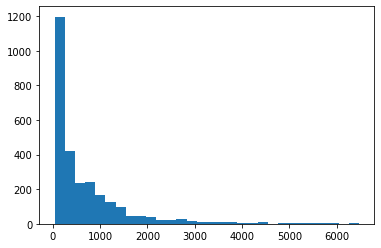

train_tar_max_len : 342


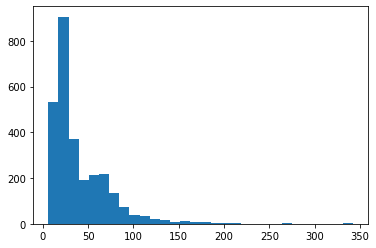

In [ ]:
# X축 : uid, Y축 : 길이
train_src_len = []
for m in train_src:
    m_len = len(m.split(' '))
    train_src_len.append(m_len)
print('train_src_max_len :', max(train_src_len))
plt.hist(train_src_len, bins=30)
plt.show()

train_tar_len = []
for m in train_tar:
    m_len = len(m.split(' '))
    train_tar_len.append(m_len)
print('train_tar_max_len :', max(train_tar_len))
plt.hist(train_tar_len, bins=30)
plt.show()

In [ ]:
src_tokenizer.fit(train_src)
tar_tokenizer.fit(train_tar)

100%|██████████| 2794/2794 [00:00<00:00, 52303.84it/s]


In [ ]:
train_src_tokens = src_tokenizer.txt2token(train_src)
val_src_tokens = src_tokenizer.txt2token(val_src)
test_src_tokens = src_tokenizer.txt2token(test_src)

train_tar_tokens = tar_tokenizer.txt2token(train_tar)
val_tar_tokens = tar_tokenizer.txt2token(val_tar)

100%|██████████| 200/200 [00:00<00:00, 78295.76it/s]


In [ ]:
input_vocab_size = len(src_tokenizer.txt2idx)
target_vocab_size = len(tar_tokenizer.txt2idx)

In [ ]:
input_vocab_size, target_vocab_size

(20002, 4877)

In [ ]:
df_train.summary.iloc[0]  # summary 첫번째 행만

'제207회 완주군의회 임시회 제1차 본회의 개의 선포.'

In [ ]:
train_tar_tokens[0], tar_tokenizer.convert(train_tar_tokens[0])

(array([   3,    8, 1131,   19,   42,   21,   24,    8,   35,   25,   49,
           5,   44,    5,   52,    2,    4,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]),
 ' 제 207 회 완주군 의회 임시회 제 1 차 본회의개의선포.')

# 데이터셋

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, src_tokens, tar_tokens, mode='train'):
        self.mode = mode
        self.src_tokens = src_tokens
        if self.mode == 'train':
            self.tar_tokens = tar_tokens
            
    def __len__(self):
        return len(self.src_tokens)
    
    def __getitem__(self, i):
        src_token = self.src_tokens[i]
        if self.mode == 'train':
            tar_token = self.tar_tokens[i]
            return {
                'src_token' : torch.tensor(src_token, dtype=torch.long),
                'tar_token' : torch.tensor(tar_token, dtype=torch.long),
            }
        else:
            return {
                'src_token' : torch.tensor(src_token, dtype=torch.long)
            }

In [ ]:
train_dataset = CustomDataset(train_src_tokens, train_tar_tokens)
val_dataset = CustomDataset(val_src_tokens, val_tar_tokens)
test_dataset = CustomDataset(test_src_tokens, None, 'test')

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=1, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=1, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, num_workers=1, shuffle=False)

# 모델 Transformer

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return torch.tensor(pos_encoding, dtype=torch.float32)

In [ ]:
def create_padding_mask(seq):
    seq = torch.tensor(torch.eq(seq, 0), dtype=torch.float32)

    # add extra dimensions to add the padding
    # to the attention logits.
    seq = seq.unsqueeze(1).unsqueeze(2)
    return seq  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
    mask = torch.ones(size, size).triu(diagonal=1)
    return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = torch.matmul(q, torch.transpose(k, -2, -1))  # (..., seq_len_q, seq_len_k)
    
    # scale matmul_qk
    dk = k.size()[-1]
    scaled_attention_logits = matmul_qk / math.sqrt(dk)
    
    # add the mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = torch.nn.functional.softmax(scaled_attention_logits, dim=-1)  # (..., seq_len_q, seq_len_k)

    output = torch.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

In [ ]:
def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
    print('Attention weights are:')
    print(temp_attn)
    print('Output is:')
    print(temp_out)

In [ ]:
np.set_printoptions(suppress=True)

temp_k = torch.tensor([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=torch.float32)  # (4, 3)

temp_v = torch.tensor([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=torch.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = torch.tensor([[0, 10, 0]], dtype=torch.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tensor([[8.4333e-26, 1.0000e+00, 8.4333e-26, 8.4333e-26]])
Output is:
tensor([[1.0000e+01, 9.2766e-25]])


In [ ]:
temp_q = torch.tensor([[10, 10, 0]], dtype=torch.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tensor([[5.0000e-01, 5.0000e-01, 4.2166e-26, 4.2166e-26]])
Output is:
tensor([[5.5000e+00, 4.6383e-25]])


In [ ]:
temp_q = torch.tensor([[0, 0, 10],
                      [0, 10, 0],
                      [10, 10, 0]], dtype=torch.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tensor([[4.2166e-26, 4.2166e-26, 5.0000e-01, 5.0000e-01],
        [8.4333e-26, 1.0000e+00, 8.4333e-26, 8.4333e-26],
        [5.0000e-01, 5.0000e-01, 4.2166e-26, 4.2166e-26]])
Output is:
tensor([[5.5000e+02, 5.5000e+00],
        [1.0000e+01, 9.2766e-25],
        [5.5000e+00, 4.6383e-25]])


In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = nn.Linear(d_model, d_model)
        self.wk = nn.Linear(d_model, d_model)
        self.wv = nn.Linear(d_model, d_model)

        self.wo = nn.Linear(d_model, d_model)
        
    def forward(self, v, k, q, mask):
        batch_size = q.size()[0]
        
        q = self.wq(q).view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        k = self.wk(k).view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        v = self.wv(v).view(batch_size, -1, self.num_heads, self.depth).transpose(1, 2)
        
        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        
        scaled_attention = scaled_attention.transpose(1,2).contiguous().view(batch_size, -1, self.num_heads * self.depth)
                
        output = self.wo(scaled_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights

In [ ]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = torch.rand(1, 60, 512)  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(torch.Size([1, 60, 512]), torch.Size([1, 8, 60, 60]))

In [ ]:
class FFN(nn.Module):
    def __init__(self, d_model, dff):
        super(FFN, self).__init__()
        self.layer1 = nn.Linear(d_model, dff)
        self.activation = nn.ReLU()
        self.fc = nn.Linear(dff, d_model)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.fc(x)

        return x

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, maximum_position_encoding, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = FFN(d_model, dff)
        
        self.layernorm1 = nn.LayerNorm([maximum_position_encoding, d_model])
        self.layernorm2 = nn.LayerNorm([maximum_position_encoding, d_model])
        
        self.dropout1 = nn.Dropout(rate)
        self.dropout2 = nn.Dropout(rate)


    def forward(self, x, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

In [ ]:
sample_encoder_layer = EncoderLayer(512, 8, 2048, encoder_len)
sample_encoder_layer_output = sample_encoder_layer(torch.rand(64, encoder_len, 512), None)
sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

torch.Size([64, 500, 512])

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, dff, maximum_position_encoding, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        
        self.ffn = FFN(d_model, dff)
        
        self.dropout1 = nn.Dropout(rate)
        self.dropout2 = nn.Dropout(rate)
        self.dropout3 = nn.Dropout(rate)
        
        self.layernorms1 = nn.ModuleList([copy.deepcopy(nn.LayerNorm([i+1, d_model])) for i in range(maximum_position_encoding)])
        self.layernorms2 = nn.ModuleList([copy.deepcopy(nn.LayerNorm([i+1, d_model])) for i in range(maximum_position_encoding)])
        self.layernorms3 = nn.ModuleList([copy.deepcopy(nn.LayerNorm([i+1, d_model])) for i in range(maximum_position_encoding)])

    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorms1[x.size(1)-1](attn1 + x)
        
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorms2[x.size(1)-1](attn2 + out1)  # (batch_size, target_seq_len, d_model)
        
        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorms3[x.size(1)-1](ffn_output + out2)  # (batch_size, target_seq_len, d_model)
        
        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
sample_decoder_layer = DecoderLayer(512, 8, 2048, decoder_len)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    torch.rand(64, decoder_len, 512), sample_encoder_layer_output,
    None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

torch.Size([64, 50, 512])

In [ ]:
def clones(module, N):
    return nn.ModuleList([copy.deepcopy(module) for i in range(N)])

In [ ]:
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, device, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model).to(device)
        
        self.dec_layers = clones(EncoderLayer(d_model, num_heads, dff, maximum_position_encoding, rate), num_layers)
        self.dropout = nn.Dropout(rate)

    def forward(self, x, mask, enc_output=None):
        if enc_output == None:
            seq_len = x.size()[1]
            attention_weights = {}
            x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
            x *= torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))
            x += self.pos_encoding[:, :seq_len, :]
            x = self.dropout(x)
            for i in range(self.num_layers):
                x = self.dec_layers[i](x, mask)
        else:
            x = enc_output
            
        return x

In [ ]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, input_vocab_size=input_vocab_size,
                         maximum_position_encoding=encoder_len,
                         device='cpu')

temp_input = torch.randint(low=0, high=input_vocab_size, size=(64, encoder_len))

sample_encoder_output = sample_encoder(temp_input, mask=None, enc_output=None)

print(sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

torch.Size([64, 500, 512])


In [ ]:
class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, device, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = nn.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model).to(device)
        
        self.dec_layers = clones(DecoderLayer(d_model, num_heads, dff, maximum_position_encoding, rate), num_layers)
        self.dropout = nn.Dropout(rate)
        
    def forward(self, x, enc_output, look_ahead_mask, padding_mask):
        seq_len = x.size()[1]
        attention_weights = {}
        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x)
        
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
            
        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [ ]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8,
                         dff=2048, target_vocab_size=target_vocab_size,
                         maximum_position_encoding=decoder_len,
                         device='cpu')

temp_input = torch.randint(low=0, high=target_vocab_size, size=(64, decoder_len))

output, attn = sample_decoder(temp_input,
                              enc_output=sample_encoder_output,
                              look_ahead_mask=None,
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(torch.Size([64, 50, 512]), torch.Size([64, 8, 50, 500]))

In [ ]:
class Transformer(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, device, rate=0.1):
        super().__init__()
        self.device = device
        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                                 input_vocab_size, pe_input, device, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                               target_vocab_size, pe_target, device, rate)

        self.final_layer = nn.Linear(d_model, target_vocab_size)

    def forward(self, inputs):
        inp, tar, enc_output = inputs

        enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

        enc_output = self.encoder(inp, enc_padding_mask, enc_output)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights, enc_output

    def create_masks(self, inp, tar):
        # Encoder padding mask
        enc_padding_mask = create_padding_mask(inp)

        # Used in the 2nd attention block in the decoder.
        # This padding mask is used to mask the encoder outputs.
        dec_padding_mask = create_padding_mask(inp)

        # Used in the 1st attention block in the decoder.
        # It is used to pad and mask future tokens in the input received by
        # the decoder.
        look_ahead_mask = create_look_ahead_mask(tar.size(1))
        dec_target_padding_mask = create_padding_mask(tar)
        look_ahead_mask = torch.maximum(dec_target_padding_mask.to(self.device), look_ahead_mask.to(self.device))

        return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [ ]:
sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048,
    input_vocab_size=input_vocab_size, target_vocab_size=target_vocab_size,
    pe_input=encoder_len, pe_target=decoder_len, device='cpu')

temp_input = torch.randint(low=0, high=input_vocab_size, size=(64, encoder_len))
temp_target = torch.randint(low=0, high=target_vocab_size, size=(64, decoder_len))

fn_out, _, _ = sample_transformer([temp_input, temp_target, None])

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=input_vocab_size,
    target_vocab_size=target_vocab_size,
    pe_input=encoder_len,
    pe_target=decoder_len-1,
    device=device,
    rate=dropout_rate
)

transformer = transformer.to(device)

# 옵티마이저, 손실함수

In [ ]:
optimizer = torch.optim.Adam(transformer.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

##  손실함수 및 평가함수 정의

In [ ]:
def loss_function(real, pred):
    mask = torch.logical_not(torch.eq(real, 0))
    loss_ = criterion(pred.permute(0,2,1), real)
    mask = torch.tensor(mask, dtype=loss_.dtype)
    loss_ = mask * loss_

    return torch.sum(loss_)/torch.sum(mask)

def accuracy_function(real, pred):
    accuracies = torch.eq(real, torch.argmax(pred, dim=2))
    mask = torch.logical_not(torch.eq(real, 0))
    accuracies = torch.logical_and(mask, accuracies)
    accuracies = torch.tensor(accuracies, dtype=torch.float32)
    mask = torch.tensor(mask, dtype=torch.float32)
    
    return torch.sum(accuracies)/torch.sum(mask)

## 학습 정의

In [ ]:
def train_step(batch_item, epoch, batch, training):
    src = batch_item['src_token'].to(device)
    tar = batch_item['tar_token'].to(device)
    
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    
    if training is True:
        transformer.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output, _, _ = transformer([src, tar_inp, None])
            loss = loss_function(tar_real, output)
        acc = accuracy_function(tar_real, output)
        loss.backward()
        optimizer.step()
        lr = optimizer.param_groups[0]["lr"]
        return loss, acc, round(lr, 10)
    else:
        transformer.eval()
        with torch.no_grad():
            output, _, _ = transformer([src, tar_inp, None])
            loss = loss_function(tar_real, output)
        acc = accuracy_function(tar_real, output)
        return loss, acc

## 학습

In [ ]:
loss_plot, val_loss_plot = [], []
acc_plot, val_acc_plot = [], []

for epoch in range(epochs):
    gc.collect()
    total_loss, total_val_loss = 0, 0
    total_acc, total_val_acc = 0, 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
    training = True
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_acc, lr = train_step(batch_item, epoch, batch, training)
        total_loss += batch_loss
        total_acc += batch_acc
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'LR' : lr,
            'Loss': '{:06f}'.format(batch_loss.item()),
            'Total Loss' : '{:06f}'.format(total_loss/(batch+1)),
            'Total ACC' : '{:06f}'.format(total_acc/(batch+1))
        })
    loss_plot.append(total_loss/(batch+1))
    acc_plot.append(total_acc/(batch+1))
    
    tqdm_dataset = tqdm(enumerate(val_dataloader))
    training = False
    for batch, batch_item in tqdm_dataset:
        batch_loss, batch_acc = train_step(batch_item, epoch, batch, training)
        total_val_loss += batch_loss
        total_val_acc += batch_acc
        
        tqdm_dataset.set_postfix({
            'Epoch': epoch + 1,
            'Val Loss': '{:06f}'.format(batch_loss.item()),
            'Total Val Loss' : '{:06f}'.format(total_val_loss/(batch+1)),
            'Total Val ACC' : '{:06f}'.format(total_val_acc/(batch+1))
        })
    val_loss_plot.append(total_val_loss/(batch+1))
    val_acc_plot.append(total_val_acc/(batch+1))

## 학습결과

In [ ]:
plt.plot(loss_plot, label='train_loss')
plt.plot(val_loss_plot, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(acc_plot, label='train_acc')
plt.plot(val_acc_plot, label='val_acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

## 추론

In [ ]:
def evaluate(tokens):
    transformer.to(device)
    decoder_input = torch.tensor([tar_tokenizer.txt2idx['sos_']] * tokens.size(0), dtype=torch.long).to(device)
    output = decoder_input.unsqueeze(1).to(device)
    enc_output = None
    for i in range(decoder_len-1):        
        # predictions.shape == (batch_size, seq_len, vocab_size)
        with torch.no_grad():
            predictions, attention_weights, enc_output = transformer([tokens, output, enc_output])
        
        # select the last token from the seq_len dimension
        predictions_ = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)
        
        predicted_id = torch.tensor(torch.argmax(predictions_, axis=-1), dtype=torch.int32)
        
        output = torch.cat([output, predicted_id], dim=-1)
    output = output.cpu().numpy()
    
    summary_list = []
    token_list = []
    for token in output:
        summary = tar_tokenizer.convert(token)
        summary_list.append(summary)
        token_list.append(token)
    return summary_list, token_list

In [ ]:
tqdm_dataset = tqdm(enumerate(val_dataloader))
preds = []
tokens = []
for batch, batch_item in tqdm_dataset:
    output = evaluate(batch_item['src_token'].to(device))
    preds.extend(output[0])
    tokens.extend(output[1])

In [ ]:
for i, (a, p) in enumerate(zip(df_val.summary, preds)):
    print('정답 :', a)
    print('예측 :', p)
    print('=================================================================================')
    if i == 10:
        break

# 제출

In [ ]:
tqdm_dataset = tqdm(enumerate(test_dataloader))
preds = []
tokens = []
for batch, batch_item in tqdm_dataset:
    output = evaluate(batch_item['src_token'].to(device))
    preds.extend(output[0])
    tokens.extend(output[1])

submission = pd.read_csv('data/sample_submission.csv')
submission['summary'] = preds

In [ ]:
submission.head()

In [ ]:
submission.to_csv('dacon_baseline.csv', index=False)

개인 Token : 3c8c629c16ae5c7fd5e48b527986f26573c9d082fa72fcdeabcec441b61ecbd3

In [ ]:
jeewoo_token = '3c8c629c16ae5c7fd5e48b527986f26573c9d082fa72fcdeabcec441b61ecbd3'

In [ ]:
from dacon_submit_api import dacon_submit_api 

result = dacon_submit_api.post_submission_file(
    'dacon_baseline.csv', 
     jeewoo_token, 
    '235813',
    'BASELINE', 
    'DACON_Baseline'
)